In [1]:
import requests
import json
import os
from WSMethods import *
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
# Define device IP
ip = '169.254.6.8'
# Get device info 
result = requests.get('http://' + ip + '/waveshaper/devinfo').json()

# Set frequency variables from device info
s = result['startfreq']
e = result['stopfreq']
wsFreq = np.arange(s, e + 0.001, 0.001)

wsAttn = np.zeros_like(wsFreq)
c0 = 299792458

def gauss(x, a=1, mu=0, sigma=1):
    return a * np.exp(-(x - mu)**2 / (2*sigma**2))

<ipython-input-4-a0ab546a116e>:16: RuntimeWarning: divide by zero encountered in log10
  wsAttn = -10*np.log10(wsAttn)


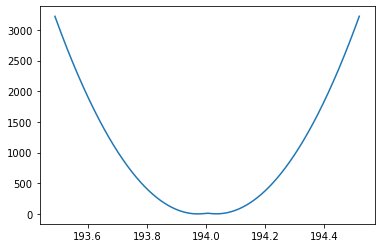

In [4]:
## double peak

centerWL = 1545.29
spacingWL = 0.5
widthWL = 0.1
peak1 = 1
peak2 = 0.7

centerFreq = c0/centerWL/1000.0
spacingFreq = spacingWL/centerWL * centerFreq
widthFreq = widthWL/centerWL * centerFreq



wsAttn = gauss(wsFreq, peak1, centerFreq - spacingFreq/2, widthFreq) + gauss(wsFreq, peak2, centerFreq + spacingFreq/2, widthFreq)
wsAttn = -10*np.log10(wsAttn)
plt.plot(wsFreq, wsAttn)
wsPhase = np.zeros(wsFreq.shape)
wsPort = np.ones(wsFreq.shape)
# Upload profile using created data
r = uploadProfile(ip, wsFreq, wsAttn, wsPhase, wsPort)


<ipython-input-3-fff17e4f6e8b>:11: RuntimeWarning: divide by zero encountered in log10
  wsAttn = -10*np.log10(wsAttn)


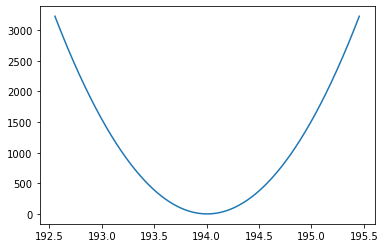

In [3]:
## single peak
centerWL = 1545.29
widthWL = 0.3

centerFreq = c0/centerWL/1000.0
widthFreq = widthWL/centerWL * centerFreq



wsAttn = gauss(wsFreq, 1, centerFreq, widthFreq)
wsAttn = -10*np.log10(wsAttn)
plt.plot(wsFreq, wsAttn)
wsPhase = np.zeros(wsFreq.shape)
wsPort = np.ones(wsFreq.shape)
# Upload profile using created data
r = uploadProfile(ip, wsFreq, wsAttn, wsPhase, wsPort)